<a href="https://www.kaggle.com/code/dheerajrhegde/tensorflow-convnet-with-imagedatagenerator?scriptVersionId=147618081" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-images/horse2.jpg
/kaggle/input/test-images/human5.jpg
/kaggle/input/test-images/horse4.jpg
/kaggle/input/test-images/horse1.jpg
/kaggle/input/test-images/horse5.jpg
/kaggle/input/test-images/human4.jpg
/kaggle/input/test-images/human1.jpg
/kaggle/input/test-images/human3.jpg
/kaggle/input/test-images/human2.jpg
/kaggle/input/test-images/horse3.jpg


In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.12.0'

In [3]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-10-22 22:05:23--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.207, 173.194.76.207, 66.102.1.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  42.1MB/s    in 3.9s    

2023-10-22 22:05:27 (36.9 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [4]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-10-22 22:05:28--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.207, 173.194.76.207, 66.102.1.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  12.4MB/s    in 0.9s    

2023-10-22 22:05:29 (12.4 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [5]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')
zip_ref.close()

In [6]:
import os

train_horse_dir = os.path.join("./horse-or-human/horses")
train_human_dir = os.path.join("./horse-or-human/humans")
os.listdir(train_horse_dir)[:10]
os.listdir(train_human_dir)[:10]

['human14-05.png',
 'human13-07.png',
 'human16-07.png',
 'human17-08.png',
 'human10-28.png',
 'human16-18.png',
 'human10-16.png',
 'human15-05.png',
 'human02-20.png',
 'human11-29.png']

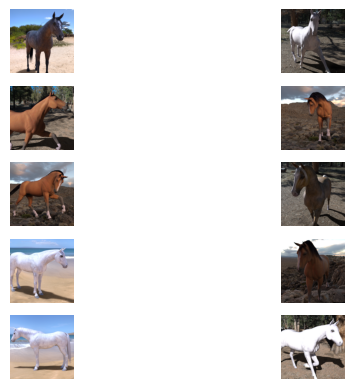

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
       
x=1
img = [mpimg.imread(os.path.join(train_horse_dir,i)) for i in os.listdir(train_horse_dir)[:10]]
for i in img:
    sp = plt.subplot(5, 2, x)
    x+=1
    sp.axis('Off')
    sp.imshow(i)

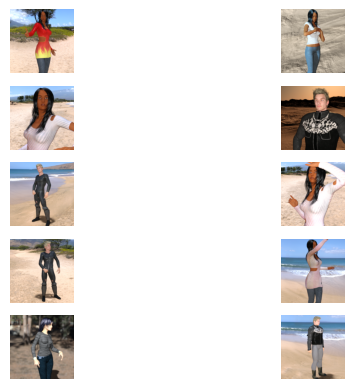

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
       
x=1
img = [mpimg.imread(os.path.join(train_human_dir,i)) for i in os.listdir(train_human_dir)[:10]]
for i in img:
    sp = plt.subplot(5, 2, x)
    x+=1
    sp.axis('Off')
    sp.imshow(i)

In [9]:
model = keras.Sequential(
    [keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(300,300,3)),
    keras.layers.MaxPooling2D(2,2), 
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2,3),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation="relu"),
    keras.layers.Dense(units=1, activation=tf.nn.sigmoid)]
)
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    "./horse-or-human",
    target_size=(300,300),
    batch_size=128,
    class_mode="binary"
)

validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    "./validation-horse-or-human",
    target_size = (300,300),
    batch_size=32,
    class_mode="binary"
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=2,
    validation_data=validation_generator
)

Epoch 1/15
8/8 - 54s - loss: 0.7555 - accuracy: 0.5050 - val_loss: 0.9588 - val_accuracy: 0.5000 - 54s/epoch - 7s/step
Epoch 2/15
8/8 - 51s - loss: 0.7621 - accuracy: 0.6908 - val_loss: 0.6544 - val_accuracy: 0.8438 - 51s/epoch - 6s/step
Epoch 3/15
8/8 - 51s - loss: 0.6492 - accuracy: 0.6986 - val_loss: 0.3988 - val_accuracy: 0.8594 - 51s/epoch - 6s/step
Epoch 4/15
8/8 - 51s - loss: 0.5602 - accuracy: 0.7108 - val_loss: 1.1129 - val_accuracy: 0.6484 - 51s/epoch - 6s/step
Epoch 5/15
8/8 - 51s - loss: 0.3735 - accuracy: 0.8565 - val_loss: 0.4078 - val_accuracy: 0.8828 - 51s/epoch - 6s/step
Epoch 6/15
8/8 - 52s - loss: 0.3366 - accuracy: 0.8788 - val_loss: 0.4069 - val_accuracy: 0.8906 - 52s/epoch - 7s/step
Epoch 7/15
8/8 - 53s - loss: 1.3042 - accuracy: 0.8699 - val_loss: 0.3272 - val_accuracy: 0.8828 - 53s/epoch - 7s/step
Epoch 8/15
8/8 - 52s - loss: 0.1704 - accuracy: 0.9477 - val_loss: 0.5796 - val_accuracy: 0.8789 - 52s/epoch - 6s/step
Epoch 9/15
8/8 - 52s - loss: 0.1989 - accuracy: 

In [12]:
from tensorflow.keras.utils import load_img, img_to_array
#img = [ mpimg.imread(os.path.join(train_horse_dir, i)) for i in os.listdir(train_horse_dir)[:10]]

img = [(load_img("/kaggle/input/test-images/"+file, target_size=(300, 300)),"/kaggle/input/test-images/"+file) for file in os.listdir("/kaggle/input/test-images/")[:10]]

for (i,j) in img:
    y = img_to_array(i)
    y /= 255
    y = np.expand_dims(y, axis=0)
    images = np.vstack([y])
    classes = model.predict(images, batch_size=10,verbose=5)
    print(classes)
    if classes[0]>0.5:
        print(j, classes[0], "hunan")
    else:
        print(j, classes[0], "horse")
    

[[0.99998605]]
/kaggle/input/test-images/horse2.jpg [0.99998605] hunan
[[9.127785e-07]]
/kaggle/input/test-images/human5.jpg [9.127785e-07] horse
[[0.97481436]]
/kaggle/input/test-images/horse4.jpg [0.97481436] hunan
[[7.6294405e-08]]
/kaggle/input/test-images/horse1.jpg [7.6294405e-08] horse
[[0.17650703]]
/kaggle/input/test-images/horse5.jpg [0.17650703] horse
[[0.0263842]]
/kaggle/input/test-images/human4.jpg [0.0263842] horse
[[0.9993747]]
/kaggle/input/test-images/human1.jpg [0.9993747] hunan
[[0.7598227]]
/kaggle/input/test-images/human3.jpg [0.7598227] hunan
[[0.99999344]]
/kaggle/input/test-images/human2.jpg [0.99999344] hunan
[[0.00764121]]
/kaggle/input/test-images/horse3.jpg [0.00764121] horse
